# Question D3

*Question*: What is the size of the organization you currently work for?

*Answer Type*: Single Option

*Options*: [1-10 employees, 11-50 employees, 51-250 employees, 251-500 employees, 501-1,000 employees, 1,001-2,000 employees, More than 2,000 employees]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D3_Company_Size'].head()

0        1,001-2,000 employees
1    More than 2,000 employees
2             51-250 employees
3    More than 2,000 employees
4          501-1,000 employees
Name: D3_Company_Size, dtype: object

In [4]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [5]:
# update values in D3 column
dataframe_obj.df['D3_Company_Size'] = rename_values(rename_mapping=d3_rename_mapping,  
                                                    values=list(dataframe_obj.df['D3_Company_Size']))

In [6]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D3_Company_Size')

In [7]:
positions_mapping = {
    '+2000': 6,
    '51-250': 2,
    '11-50': 1,
    '1001-2000': 5,
    '1-10': 0,
    '251-500': 3,
    '501-1000': 4
}

In [8]:
# barplot data
indexes = list(dataframe_obj.df['D3_Company_Size'].value_counts().index)
values = list(dataframe_obj.df['D3_Company_Size'].value_counts())
chart_positions = [positions_mapping[idx] for idx in indexes]

In [9]:
# plot object
d3_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position'], ascending=True))

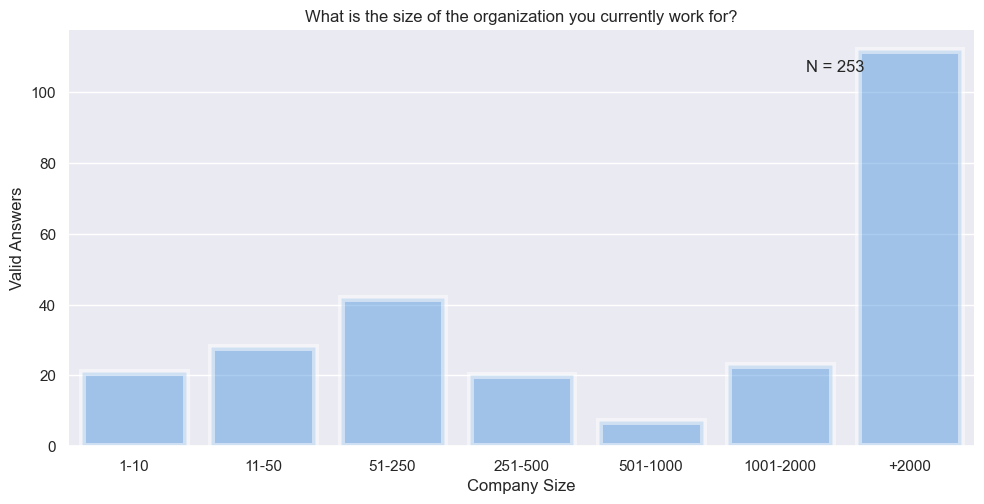

In [10]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D3_Company_Size'])))
total_answers_int = len(list(dataframe_obj.df['D3_Company_Size']))

d3_plot.single_barplot(x_axis="Company Size", y_axis="Answers", 
                       title="What is the size of the organization you currently work for?",
                       x_label="Company Size", y_label="Valid Answers", x_label_rotation=0, color="#429bf5", 
                       total_answers=total_answers, bar_orientation='vertical')

### Bootstrapping Analysis

In [11]:
valid_options_list = list(dataframe_obj.df['D3_Company_Size'].unique())
valid_answers_list = list(dataframe_obj.df['D3_Company_Size'])

In [12]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [21]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [positions_mapping[idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [22]:
values = [100 * v for v in values]

In [23]:
# plot object for bootstrapped data
d3_boot_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position'], ascending=True))

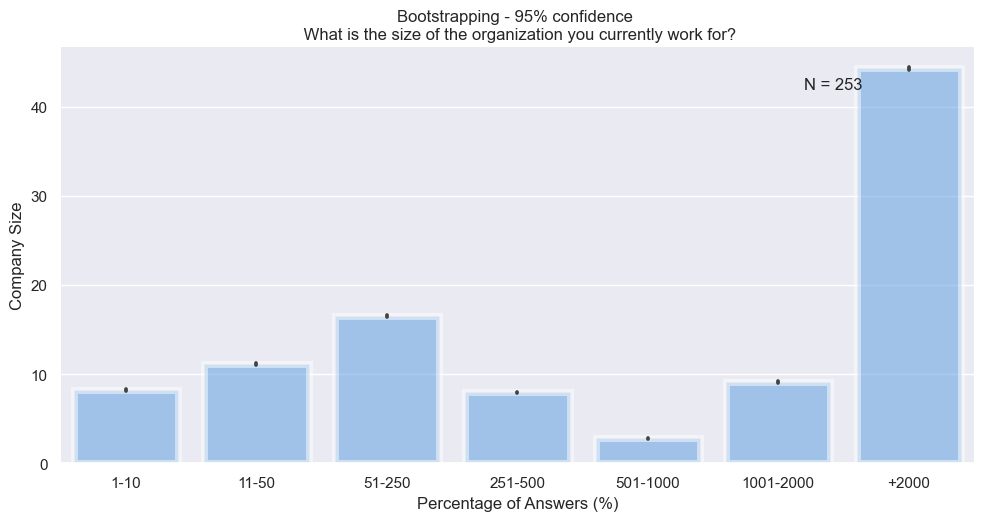

In [24]:
d3_boot_plot.single_barplot(x_axis="Company Size", y_axis="Value", 
                       title="Bootstrapping - 95% confidence \n What is the size of the organization you currently work for?",
                       x_label="Percentage of Answers (%)", y_label="Company Size", x_label_rotation=0, color="#429bf5", 
                       total_answers=total_answers, bar_orientation='vertical')

In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
1001-2000:(0.08994070865012227, 0.09110276679841897, 0.09226482494671567)
+2000:(0.44119830782315433, 0.44307114624505933, 0.44494398466696433)
51-250:(0.16354530395736674, 0.16501581027667986, 0.16648631659599297)
501-1000:(0.027261676712551162, 0.027885375494071146, 0.02850907427559113)
1-10:(0.08117084780111532, 0.08232015810276679, 0.08346946840441825)
251-500:(0.07828000064110646, 0.0793201581027668, 0.08036031556442713)
11-50:(0.11006646334580578, 0.11128458498023716, 0.11250270661466855)
